<a href="https://colab.research.google.com/github/aasifahmed23/AI-ML-/blob/main/Asif_DLCP_Project1_Milestone3b_Babysitting_SVHN_KERAS_Neural_Network_Questions_v1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

### SVHN neural network using Keras

### Loading the dataset : Lets us load the training and the test data and check the size of the tensors. Lets us also display the first few images from the training set. (5 points)

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3Aietf%3Awg%3Aoauth%3A2.0%3Aoob&scope=email%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdocs.test%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdrive%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdrive.photos.readonly%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fpeopleapi.readonly&response_type=code

Enter your authorization code:
··········
Mounted at /content/drive


In [ ]:
import tensorflow as tf
tf.set_random_seed(44)
# Reset the Graph
tf.reset_default_graph()
import warnings
warnings.filterwarnings('ignore')
import numpy as np
np.seterr(over='ignore')
import os
import matplotlib.pyplot as plt
import h5py
import numpy as np

In [ ]:
#import h5py
import keras

# Open the file as readonly
h5f = h5py.File('/content/drive/My Drive/DLCP/Project-1/Data/SVHN_single_grey1.h5', 'r')
#h5f = h5py.File('SVHN_single_grey1.h5', 'r')
# Load the training, test and validation set
X_train = h5f['X_train'][:]
y_train = h5f['y_train'][:]
X_test = h5f['X_test'][:]
y_test = h5f['y_test'][:]


# Close this file
h5f.close()

### Print the Training and validation set shapes
print('Training set', X_train.shape, y_train.shape)
print('Test set', X_test.shape, y_test.shape)
print("\n")

# Flatten the images for keras model
x_train = X_train.reshape(X_train.shape[0], 1024)
x_test = X_test.reshape(X_test.shape[0], 1024)

# normalize inputs from 0-255 to 0-1
x_train /= 255.0
x_test /= 255.0

# convert class vectors to binary class matrices for keras
num_classes = 10
y_train = tf.keras.utils.to_categorical(y_train, num_classes)
y_test = tf.keras.utils.to_categorical(y_test, num_classes)

# Print the Training and Test Set shapes for KERAS
print('Keras Training set', x_train.shape, y_train.shape)
print('Keras Test set', x_test.shape, y_test.shape)


Using TensorFlow backend.


Training set (42000, 32, 32) (42000,)
Test set (18000, 32, 32) (18000,)


Keras Training set (42000, 1024) (42000, 10)
Keras Test set (18000, 1024) (18000, 10)


When you print the shapes of the training and test sets, they should be as below:

('Training set', (42000, 32, 32), (42000,))
('Test set', (18000, 32, 32), (18000,))


('Training set', (42000, 1024), (42000, 10))
('Test set', (18000, 1024), (18000, 10))

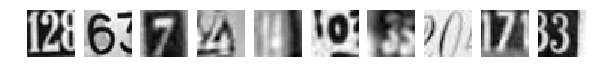

labels for each of the above images in One Hot Encoding:
 [[0. 0. 1. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 1. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 1. 0. 0.]
 [0. 0. 0. 0. 1. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 1. 0. 0. 0. 0. 0.]
 [1. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 1. 0. 0. 0. 0. 0. 0.]
 [1. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 1. 0. 0.]
 [0. 0. 0. 1. 0. 0. 0. 0. 0. 0.]]


In [ ]:
# Visualizing the first 10 images in the dataset and their labels
%matplotlib inline
import matplotlib.pyplot as plt
plt.figure(figsize=(10, 1))
for i in range(10):
    plt.subplot(1, 10, i+1)
    plt.imshow(x_train[i].reshape(32, 32), cmap="gray")
    plt.axis('off')
plt.show()
print('labels for each of the above images in One Hot Encoding:\n %s' % (y_train[0:10]))


###Build the Neural Network Model in Keras (10 Points)

In [ ]:
# Reset the Graph
tf.reset_default_graph()
#Initialize Sequential model
model = tf.keras.models.Sequential()

In [ ]:
#Reshape data from 2D to 1D -> 32x32 to 1024
model.add(tf.keras.layers.Reshape((1024,),input_shape=(32,32,)))

In [ ]:
#Normalize the data using batchnorm with 1024 features in each image
model.add(tf.keras.layers.BatchNormalization(input_shape=(1024,)))
#kernel_regularizer=tf.keras.regularizers.l1(Lambda)

In [ ]:
#Build the 5-layer NN Structure with 200,100,60,30 & 10 Neurons

#Add 1st hidden layer
model.add(tf.keras.layers.Dense(200, activation='sigmoid'))
#Add 2nd hidden layer
model.add(tf.keras.layers.Dense(100, activation='sigmoid',kernel_regularizer=tf.keras.regularizers.l2(1e-1)))
#Add 3rd hidden layer
model.add(tf.keras.layers.Dense(60, activation='sigmoid'))
#Add 4th hidden layer
model.add(tf.keras.layers.Dense(30, activation='sigmoid'))
#Add OUTPUT layer
model.add(tf.keras.layers.Dense(10, activation='softmax'))



In [ ]:
#Compile the model
model.compile(optimizer=tf.keras.optimizers.SGD(lr=1e-3), loss='categorical_crossentropy', metrics=['accuracy'])

In [ ]:
# Fit the model
model.fit(X_train,y_train,
          validation_data=(X_test,y_test),
          epochs=10,
          batch_size=1000)

# Review the model
model.summary()

Train on 42000 samples, validate on 18000 samples
Epoch 1/10
42000/42000 [==============================] - 1s 13us/sample - loss: 15.8122 - acc: 0.0992 - val_loss: 15.6733 - val_acc: 0.1018
Epoch 2/10
42000/42000 [==============================] - 0s 10us/sample - loss: 15.5615 - acc: 0.0992 - val_loss: 15.4274 - val_acc: 0.1018
Epoch 3/10
42000/42000 [==============================] - 0s 10us/sample - loss: 15.3188 - acc: 0.0992 - val_loss: 15.1889 - val_acc: 0.1018
Epoch 4/10
42000/42000 [==============================] - 0s 10us/sample - loss: 15.0833 - acc: 0.0992 - val_loss: 14.9572 - val_acc: 0.1018
Epoch 5/10
42000/42000 [==============================] - 0s 9us/sample - loss: 14.8543 - acc: 0.0992 - val_loss: 14.7317 - val_acc: 0.1018
Epoch 6/10
42000/42000 [==============================] - 0s 8us/sample - loss: 14.6311 - acc: 0.0992 - val_loss: 14.5117 - val_acc: 0.1018
Epoch 7/10
42000/42000 [==============================] - 0s 8us/sample - loss: 14.4134 - acc: 0.0992 - va

In [ ]:
# Import all the that you need
from random import shuffle

# Reset the Graph
tf.reset_default_graph()
#Initialize Sequential model
model = tf.keras.models.Sequential()
#Reshape data from 2D to 1D -> 32x32 to 1024
model.add(tf.keras.layers.Reshape((1024,),input_shape=(32,32,)))

#Normalize the data using batchnorm with 1024 features in each image
model.add(tf.keras.layers.BatchNormalization(input_shape=(1024,)))

#Build the 5-layer NN Structure with 200,100,60,30 & 10 Neurons
Lambda = 1e3
output_nodes = 10
hidden_nodes = [200,100,60,30]

#Add 1st hidden layer
model.add(tf.keras.layers.Dense(hidden_nodes[0], activation='sigmoid'))
#Add 2nd hidden layer
model.add(tf.keras.layers.Dense(hidden_nodes[1], activation='sigmoid',kernel_regularizer=tf.keras.regularizers.l2(Lambda)))
#Add 3rd hidden layer
model.add(tf.keras.layers.Dense(hidden_nodes[2], activation='sigmoid'))
#Add 4th hidden layer
model.add(tf.keras.layers.Dense(hidden_nodes[3], activation='sigmoid'))
#Add OUTPUT layer
model.add(tf.keras.layers.Dense(output_nodes, activation='softmax'))


#define the train and test loops and return score
def train_and_test_loop(iterations, lr, Lambda, verb=True): # Lift this line to reinitialize the graph during each training/test cycle


    ## Define hyperparameters
    iterations = iterations
    learning_rate = lr

    #Create optimizer with non-default learning rate
    sgd_optimizer = tf.keras.optimizers.SGD(lr=lr)

    # Compile the model
    model.compile(optimizer=sgd_optimizer, loss='categorical_crossentropy', metrics=['accuracy'])


    # Fit the model
    hist = model.fit(X_train,y_train,validation_data=(X_test,y_test),epochs=iterations,batch_size=500)
    val_acc    = hist.history['val_acc']
    model.summary()

    return val_acc

### Babysitting the learning process. Complete all the steps below to optimize your model (15 points)

### Step 1: Double Check that the loss is reasonable : Disable the regularization

In [ ]:
# Set the hyperparameters
lr = 0.00001
Lambda = 0
# Call the train and test function
train_and_test_loop(1, lr, Lambda)

Train on 42000 samples, validate on 18000 samples
42000/42000 [==============================] - 1s 16us/sample - loss: 2.5358 - acc: 0.0999 - val_loss: 2.5379 - val_acc: 0.1002
Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
reshape (Reshape)            (None, 1024)              0         
_________________________________________________________________
batch_normalization (BatchNo (None, 1024)              4096      
_________________________________________________________________
dense (Dense)                (None, 200)               205000    
_________________________________________________________________
dense_1 (Dense)              (None, 100)               20100     
_________________________________________________________________
dense_2 (Dense)              (None, 60)                6060      
_________________________________________________________________
dense_3 (D

[0.10016666]

Is the loss range correct?? What about accuracy, does it make sense for an untrained network?

### Step 2: Now, lets crank up the Lambda(Regularization)and check what it does to our loss function.

In [ ]:
# Set the hyperparameters (Crank up the lambda value)
lr = 0.00001
Lambda = 1e3
# Call the train and test function
train_and_test_loop(1, lr, Lambda)

Train on 42000 samples, validate on 18000 samples
42000/42000 [==============================] - 1s 17us/sample - loss: 39003.0764 - acc: 0.0998 - val_loss: 4509.1137 - val_acc: 0.1004
Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
reshape (Reshape)            (None, 1024)              0         
_________________________________________________________________
batch_normalization (BatchNo (None, 1024)              4096      
_________________________________________________________________
dense (Dense)                (None, 200)               205000    
_________________________________________________________________
dense_1 (Dense)              (None, 100)               20100     
_________________________________________________________________
dense_2 (Dense)              (None, 60)                6060      
_________________________________________________________________
den

[0.10044444]

The loss of should go up in this step. *loss* went up. Good! (Another sanity check)

### Step 3: Now, lets overfit to a small subset of our dataset, in this case 20 images.

In [ ]:
X_train_subset = X_train[0:20]

In [ ]:
y_train_subset = y_train[0:20]

In [ ]:
X_train = X_train_subset
y_train = y_train_subset

In [ ]:
# Print the X_train shape
x_train.shape

(42000, 1024)

In [ ]:
# Print the Y_train shape
y_train.shape

(20, 10)

### Tip: Make sure that you can overfit very small portion of the training data
So, set a small learning rate and turn regularization off

In the code below:
- Take the first 20 examples from SVHN
- turn off regularization(reg=0.0)
- use simple vanilla 'sgd'

In [ ]:
# Set hyperparameters
lr = 1
Lambda = 0
#call the train and test function (run it for sufficient epochs until the accuracy is going to 100%)
train_and_test_loop(10000, lr, Lambda)

Train on 20 samples, validate on 18000 samples
Epoch 1/10000
20/20 [==============================] - 0s 16ms/sample - loss: 2.6259 - acc: 0.1500 - val_loss: 2.7609 - val_acc: 0.1008
Epoch 2/10000
20/20 [==============================] - 0s 9ms/sample - loss: 2.0246 - acc: 0.2500 - val_loss: 2.6204 - val_acc: 0.0955
Epoch 3/10000
20/20 [==============================] - 0s 9ms/sample - loss: 1.9900 - acc: 0.1500 - val_loss: 2.7690 - val_acc: 0.1008
Epoch 4/10000
20/20 [==============================] - 0s 8ms/sample - loss: 1.9724 - acc: 0.2500 - val_loss: 2.6762 - val_acc: 0.0955
Epoch 5/10000
20/20 [==============================] - 0s 9ms/sample - loss: 1.9639 - acc: 0.1500 - val_loss: 2.8212 - val_acc: 0.1008
Epoch 6/10000
20/20 [==============================] - 0s 8ms/sample - loss: 1.9594 - acc: 0.2500 - val_loss: 2.7260 - val_acc: 0.1016
Epoch 7/10000
20/20 [==============================] - 0s 9ms/sample - loss: 1.9665 - acc: 0.2000 - val_loss: 2.8721 - val_acc: 0.1008
Epoch 8

[0.100777775,
 0.0955,
 0.100777775,
 0.0955,
 0.100777775,
 0.101555556,
 0.100777775,
 0.101555556,
 0.100777775,
 0.101555556,
 0.100777775,
 0.101555556,
 0.100777775,
 0.101555556,
 0.100777775,
 0.101555556,
 0.100777775,
 0.101555556,
 0.100777775,
 0.101555556,
 0.100777775,
 0.101555556,
 0.100777775,
 0.101555556,
 0.100777775,
 0.101555556,
 0.100777775,
 0.101555556,
 0.100777775,
 0.101555556,
 0.100777775,
 0.101555556,
 0.100777775,
 0.101555556,
 0.100777775,
 0.101555556,
 0.100777775,
 0.101555556,
 0.100777775,
 0.101555556,
 0.100777775,
 0.101555556,
 0.100777775,
 0.101555556,
 0.101,
 0.101444446,
 0.10211111,
 0.101166666,
 0.09861111,
 0.101222225,
 0.0995,
 0.101333335,
 0.1005,
 0.10072222,
 0.09961111,
 0.10061111,
 0.09966667,
 0.1005,
 0.09977778,
 0.100777775,
 0.10038889,
 0.100944445,
 0.09994444,
 0.101,
 0.09988889,
 0.10044444,
 0.09922222,
 0.10005555,
 0.09955555,
 0.09944444,
 0.09916667,
 0.09916667,
 0.09911111,
 0.099,
 0.09911111,
 0.09972222,



```
# This is formatted as code
```

Very small loss(2.2e-6 %),  We are successful in overfitting as train accuracy going to 100.
However the validation accuracy remains only 11.6% even if the training accuracy is 100% , since we are feeding only a small portion of the data.

### Loading the original dataset again

In [ ]:
import h5py


# Open the file as readonly
h5f = h5py.File('/content/drive/My Drive/DLCP/Project-1/Data/SVHN_single_grey1.h5', 'r')
#h5f = h5py.File('SVHN_single_grey1.h5', 'r')
# Load the training, test and validation set
X_train = h5f['X_train'][:]
y_train = h5f['y_train'][:]
X_test = h5f['X_test'][:]
y_test = h5f['y_test'][:]


# Close this file
h5f.close()

### Print the Training and validation set shapes
print('Training set', X_train.shape, y_train.shape)
print('Test set', X_test.shape, y_test.shape)
print("\n")

# Flatten the images for keras model
x_train = X_train.reshape(X_train.shape[0], 1024)
x_test = X_test.reshape(X_test.shape[0], 1024)

# normalize inputs from 0-255 to 0-1
x_train /= 255.0
x_test /= 255.0

# convert class vectors to binary class matrices for keras
num_classes = 10
y_train = tf.keras.utils.to_categorical(y_train, num_classes)
y_test = tf.keras.utils.to_categorical(y_test, num_classes)

# Print the Training and Test Set shapes for KERAS
print('Keras Training set', x_train.shape, y_train.shape)
print('Keras Test set', x_test.shape, y_test.shape)

Training set (42000, 32, 32) (42000,)
Test set (18000, 32, 32) (18000,)


Keras Training set (42000, 1024) (42000, 10)
Keras Test set (18000, 1024) (18000, 10)


###Step 4: Start with small regularization and find learning rate that makes the loss go down.

- we start with Lambda(small regularization) = 1e-7
- we start with a small learning rate =1e-7

In [ ]:
#set the hyperparameters according to the above instructions
lr = 1e-7
Lambda = 1e-7
#call the train and test function
train_and_test_loop(500, lr, Lambda)

Train on 42000 samples, validate on 18000 samples
Epoch 1/500
42000/42000 [==============================] - 1s 18us/sample - loss: 2.5975 - acc: 0.0993 - val_loss: 2.5974 - val_acc: 0.1016
Epoch 2/500
42000/42000 [==============================] - 1s 15us/sample - loss: 2.5975 - acc: 0.0993 - val_loss: 2.5971 - val_acc: 0.1016
Epoch 3/500
42000/42000 [==============================] - 1s 14us/sample - loss: 2.5975 - acc: 0.0993 - val_loss: 2.5969 - val_acc: 0.1016
Epoch 4/500
42000/42000 [==============================] - 1s 14us/sample - loss: 2.5975 - acc: 0.0993 - val_loss: 2.5968 - val_acc: 0.1016
Epoch 5/500
42000/42000 [==============================] - 1s 13us/sample - loss: 2.5975 - acc: 0.0993 - val_loss: 2.5967 - val_acc: 0.1016
Epoch 6/500
42000/42000 [==============================] - 1s 13us/sample - loss: 2.5975 - acc: 0.0993 - val_loss: 2.5967 - val_acc: 0.1016
Epoch 7/500
42000/42000 [==============================] - 1s 13us/sample - loss: 2.5975 - acc: 0.0993 - val_l

[0.101555556,
 0.101555556,
 0.101555556,
 0.101555556,
 0.101555556,
 0.101555556,
 0.101555556,
 0.101555556,
 0.101555556,
 0.101555556,
 0.101555556,
 0.101555556,
 0.101555556,
 0.101555556,
 0.101555556,
 0.101555556,
 0.101555556,
 0.101555556,
 0.101555556,
 0.101555556,
 0.101555556,
 0.101555556,
 0.101555556,
 0.101555556,
 0.101555556,
 0.101555556,
 0.101555556,
 0.101555556,
 0.101555556,
 0.101555556,
 0.101555556,
 0.101555556,
 0.101555556,
 0.101555556,
 0.101555556,
 0.101555556,
 0.101555556,
 0.101555556,
 0.101555556,
 0.101555556,
 0.101555556,
 0.101555556,
 0.101555556,
 0.101555556,
 0.101555556,
 0.101555556,
 0.101555556,
 0.101555556,
 0.101555556,
 0.101555556,
 0.101555556,
 0.101555556,
 0.101555556,
 0.101555556,
 0.101555556,
 0.101555556,
 0.101555556,
 0.101555556,
 0.101555556,
 0.101555556,
 0.101555556,
 0.101555556,
 0.101555556,
 0.101555556,
 0.101555556,
 0.101555556,
 0.101555556,
 0.101555556,
 0.101555556,
 0.101555556,
 0.101555556,
 0.101

####Please document your findings of the results of the above step
> Loss remaining same (250%) , learning rate(1e-7) is very small



### Step 5: Okay now lets try a (larger) learning rate . What could possibly go wrong?

- Learning rate lr  
- Regularization lambda


In [ ]:
#Set Hyperparameters( High value for lr and low values for lambda)
lr = 1e6
Lambda = 1e-7
# Call the train and test function
train_and_test_loop(500, lr, Lambda)

Train on 42000 samples, validate on 18000 samples
Epoch 1/500
42000/42000 [==============================] - 1s 18us/sample - loss: 4349263.2755 - acc: 0.1003 - val_loss: 3291477.6667 - val_acc: 0.0982
Epoch 2/500
42000/42000 [==============================] - 1s 14us/sample - loss: 4527176.2738 - acc: 0.0991 - val_loss: 6320287.4861 - val_acc: 0.1002
Epoch 3/500
42000/42000 [==============================] - 1s 13us/sample - loss: 4574520.0312 - acc: 0.1011 - val_loss: 2581402.1389 - val_acc: 0.0982
Epoch 4/500
42000/42000 [==============================] - 1s 13us/sample - loss: 4469854.3304 - acc: 0.0962 - val_loss: 4262921.4444 - val_acc: 0.1007
Epoch 5/500
42000/42000 [==============================] - 1s 12us/sample - loss: 4539998.9836 - acc: 0.1004 - val_loss: 5910717.5972 - val_acc: 0.1018
Epoch 6/500
42000/42000 [==============================] - 1s 12us/sample - loss: 4516118.1310 - acc: 0.0999 - val_loss: 2950402.2847 - val_acc: 0.0955
Epoch 7/500
42000/42000 [=============

[0.098222226,
 0.10022222,
 0.098222226,
 0.100666665,
 0.10177778,
 0.0955,
 0.100777775,
 0.101555556,
 0.10022222,
 0.0955,
 0.10016666,
 0.098222226,
 0.101555556,
 0.098222226,
 0.100666665,
 0.098222226,
 0.0955,
 0.100666665,
 0.101555556,
 0.100666665,
 0.098222226,
 0.10044444,
 0.098222226,
 0.10016666,
 0.101555556,
 0.100777775,
 0.098222226,
 0.100666665,
 0.10016666,
 0.10044444,
 0.100777775,
 0.10016666,
 0.100666665,
 0.101555556,
 0.10022222,
 0.100666665,
 0.10016666,
 0.098222226,
 0.100777775,
 0.098222226,
 0.100666665,
 0.10016666,
 0.10044444,
 0.100666665,
 0.10022222,
 0.10177778,
 0.10016666,
 0.10044444,
 0.10177778,
 0.100777775,
 0.10044444,
 0.10016666,
 0.100777775,
 0.0955,
 0.10022222,
 0.10044444,
 0.100666665,
 0.0955,
 0.098222226,
 0.101555556,
 0.10177778,
 0.10016666,
 0.101555556,
 0.10044444,
 0.100666665,
 0.098222226,
 0.10177778,
 0.100666665,
 0.101555556,
 0.098222226,
 0.100666665,
 0.0955,
 0.10177778,
 0.100777775,
 0.10016666,
 0.10066

####Loss exploding(4.5e8 %). Learning rate(1e6) is too high.
High learning rate increases the cost



### Step 6: Train the model for different learning rates (between 1e-7 to 1e6) based on the learning from above steps

- learning rate = 1e-1
- regularization remains the small, lambda (1e-7)

In [ ]:
lr = 1e-3
Lambda = 1e-7
# Call the train and test function
train_and_test_loop(500, lr, Lambda)

Train on 42000 samples, validate on 18000 samples
Epoch 1/500
42000/42000 [==============================] - 1s 18us/sample - loss: 2.6667 - acc: 0.0997 - val_loss: 2.6323 - val_acc: 0.1007
Epoch 2/500
42000/42000 [==============================] - 1s 14us/sample - loss: 2.5913 - acc: 0.0997 - val_loss: 2.5669 - val_acc: 0.1007
Epoch 3/500
42000/42000 [==============================] - 1s 14us/sample - loss: 2.5348 - acc: 0.0997 - val_loss: 2.5173 - val_acc: 0.1007
Epoch 4/500
42000/42000 [==============================] - 1s 13us/sample - loss: 2.4917 - acc: 0.0997 - val_loss: 2.4790 - val_acc: 0.1007
Epoch 5/500
42000/42000 [==============================] - 1s 12us/sample - loss: 2.4583 - acc: 0.0997 - val_loss: 2.4489 - val_acc: 0.1007
Epoch 6/500
42000/42000 [==============================] - 1s 12us/sample - loss: 2.4319 - acc: 0.0997 - val_loss: 2.4250 - val_acc: 0.1007
Epoch 7/500
42000/42000 [==============================] - 1s 13us/sample - loss: 2.4108 - acc: 0.0997 - val_l

[0.100666665,
 0.100666665,
 0.100666665,
 0.100666665,
 0.100666665,
 0.100666665,
 0.100666665,
 0.100666665,
 0.100666665,
 0.100666665,
 0.100666665,
 0.100666665,
 0.100666665,
 0.100666665,
 0.100666665,
 0.100666665,
 0.100666665,
 0.100666665,
 0.100666665,
 0.100666665,
 0.100666665,
 0.100666665,
 0.10072222,
 0.100777775,
 0.10072222,
 0.100944445,
 0.10027778,
 0.0995,
 0.1005,
 0.09877778,
 0.09777778,
 0.09872222,
 0.09961111,
 0.09894445,
 0.09855556,
 0.09827778,
 0.09833334,
 0.096666664,
 0.09661111,
 0.09655555,
 0.09655555,
 0.096666664,
 0.09655555,
 0.09627778,
 0.09594444,
 0.09583333,
 0.09583333,
 0.09583333,
 0.09583333,
 0.09572222,
 0.09572222,
 0.09566667,
 0.09561111,
 0.09561111,
 0.0955,
 0.09544444,
 0.09538889,
 0.09527778,
 0.09527778,
 0.09522222,
 0.09527778,
 0.09516667,
 0.09516667,
 0.09522222,
 0.09527778,
 0.09527778,
 0.09527778,
 0.09538889,
 0.09544444,
 0.09544444,
 0.09544444,
 0.09538889,
 0.09522222,
 0.09511111,
 0.09516667,
 0.09516667

#### Document the findings of the above step here



### Hyperparameter Optimization

### Cross validation Strategy


- Do coarse -> fine cross-validation in stages

- First stage: only a few epochs to get rough idea of what params work
- Second stage: longer running time, finer search
- … (repeat as necessary)

### Tip for detecting explosions in the solver:
- If the cost is ever > 3 * original cost, break out early




### For example: Run coarse search for 10 times with different lr and Lambda values each with 100 epochs.


In [ ]:
#Run coarse search for a coarse range of lr and lambda values and print the results of the
#first 10 epochs and figure out the range of lr and lambda for finer search
import math
for k in range(1,100):
    lr = math.pow(10, np.random.uniform(-7.0, 4.0))
    Lambda = math.pow(10, np.random.uniform(-5,5))
    best_acc = train_and_test_loop(100, lr, Lambda, False)
    print("Try {0}/{1}: Best_val_acc: {2}, lr: {3}, Lambda: {4}\n".format(k, 100, best_acc, lr, Lambda))

#### Document the findings of the above step here:

### Now run finer search

In [ ]:
#Set a finer range of hyperparameters and figure out even finer range
import math
for k in range(1,10):
    lr = math.pow(10, np.random.uniform(-3.0, -2.0))
    Lambda = math.pow(10, np.random.uniform(-5,2))
    best_acc = train_and_test_loop(100, lr, Lambda, False)
    print("Try {0}/{1}: Best_val_acc: {2}, lr: {3}, Lambda: {4}\n".format(k, 100, best_acc, lr, Lambda))

#### Document the findings of the above step here:

### Running deep with the best possible lr and lambda and report the accuracy (5 points)

In [ ]:
#Set the best hyperparameters found in the previous steps
lr =
Lambda =
#Call the train and test function (with score)
